# Logistic Regression With Trimming

In this tutorial, we will play with the robust version of the classic binary classification problem.

**Brief summary**. Denote $\{y_i, a_i\}$ as our data pair, where $a_i$ is the $i$th image and $y_i$ is the corresponding label. Our goal is to come up with a classifier such that when there is a new image, we could automatically generate the label. When there are only two classes, for example all the $y_i$ are either $-1$ or $1$, we could use *logistic regression* to accomplish this goal. Moreover we will spin in a robust variation to automatically detect anomalies (weird images).

**Some math**. Assume $y_i \in \{-1, 1\}$, we could write out our negative log likelihood for trimming logistic regression.
$$
\min_{x, w}~~\frac{1}{m}\sum_{i=1}^m w_i\log(1 + \exp(-y_i \langle a_i, x \rangle)) + \frac{\lambda}{2}\|x\|^2
\quad \text{s.t.}~~0 \le w_i \le 1,~\sum_{i=1}^m w_i = h
$$
where $x$ is our classifier and $w$ is the trimming weights.

**Examples**. We will go throught two examples in this notebook,
* MNIST 0-1 classification
* Building classification

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../src")
import solver
import utils
import simulate

## MNIST Problem

[MNIST](http://yann.lecun.com/exdb/mnist/) is the most classic dataset used for classification.
Our goal here is to classify the hand-written digits $0$ and $1$.

In [2]:
# load data
data_folder = "../data/"
training_images = np.load(data_folder + "train_images.npy")
training_labels = np.load(data_folder + "train_labels.npy")
testing_images = np.load(data_folder + "test_images.npy")
testing_labels = np.load(data_folder + "test_labels.npy")

image_shape = (28, 28)

training_data = utils.ImageData(training_images, image_shape, labels=training_labels)
testing_data = utils.ImageData(testing_images, image_shape, labels=testing_labels)

In [3]:
print("number of images:", training_data.num_images)
print("number of \"0\" images:", training_data.class_sizes[0])
print("number of \"1\" images:", training_data.class_sizes[1])

number of images: 1000
number of "0" images: 462
number of "1" images: 538


Text(0.5, 1.0, '0')

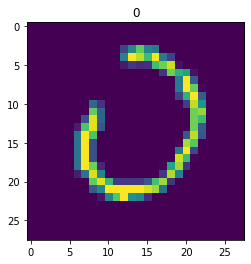

In [4]:
training_data.plot_image(0)
plt.title("0")

Text(0.5, 1.0, '1')

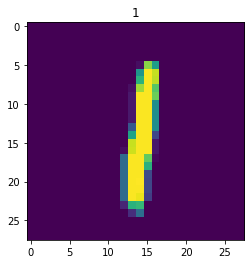

In [5]:
training_data.plot_image(600)
plt.title("1")

In [6]:
# create the model used for solving the classifier
model = solver.BinaryLogisticRegression(training_data, lam=0.1, inlier_pct=0.9)

In [7]:
classifier, outliers = model.fit_model(verbose=True)

initial obj: 6.93e-01
iter 1, obj 1.75e-01, err 9.92e+00
iter 2, obj 9.52e-02, err 5.23e+00
iter 3, obj 8.28e-02, err 3.46e+00
iter 4, obj 8.17e-02, err 2.87e+00
iter 5, obj 8.15e-02, err 1.38e+00
iter 6, obj 8.15e-02, err 1.40e+00
iter 7, obj 8.15e-02, err 6.30e-01
iter 8, obj 8.15e-02, err 5.05e-01
iter 9, obj 8.15e-02, err 4.93e-01
iter 10, obj 8.15e-02, err 4.09e-07


In [8]:
# use the classifier to predict the new images
classifier.modify_class_labels(np.array([0.0, 1.0]))
pred_labels = classifier.classify_images(testing_data.images)

print(pred_labels)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.]


In [9]:
print("correct label pct in testing data: %0.2f" %
      (np.sum(pred_labels == testing_data.labels)/testing_data.num_images))

correct label pct in testing data: 1.00


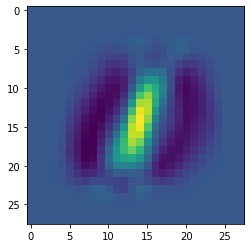

In [10]:
# check what is the classifier looks like
classifier.plot_classifier()

number of outlier images: 100
number of "0" outlier images: 50
number of "1" outlier images: 50


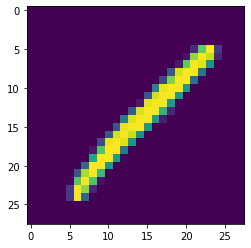

In [11]:
# check what is the outliers looks like
print("number of outlier images:", outliers.num_images)
print("number of \"0\" outlier images:", outliers.class_sizes[0])
print("number of \"1\" outlier images:", outliers.class_sizes[1])
outliers.plot_image(62)

## Building Detection

In [12]:
# building image
building_data = simulate.simulate_images((28, 28), [1, 0, 0])
crosses_data = simulate.simulate_images((28, 28), [0, 1, 0])
outliers_data = simulate.simulate_images((28, 28), [0, 0, 1])

Text(0.5, 1.0, 'building')

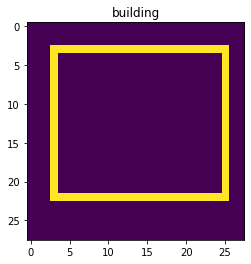

In [13]:
building_data.plot_image(0)
plt.title("building")

Text(0.5, 1.0, 'crosses')

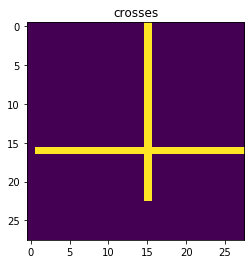

In [14]:
crosses_data.plot_image(0)
plt.title("crosses")

Text(0.5, 1.0, 'outliers')

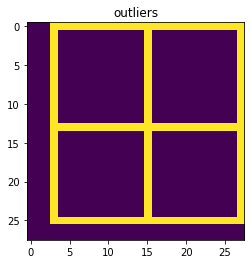

In [15]:
outliers_data.plot_image(0)
plt.title('outliers')

In [16]:
# simulate data
training_data = simulate.simulate_images((28, 28), [100, 100, 20])

In [17]:
# create the model used for solving the classifier
model = solver.BinaryLogisticRegression(training_data, lam=0.1, inlier_pct=0.9)

In [18]:
classifier, outliers = model.fit_model(verbose=True)

initial obj: 6.93e-01
iter 1, obj 2.72e-01, err 4.57e+00
iter 2, obj 2.13e-01, err 1.44e+00
iter 3, obj 2.11e-01, err 1.29e-03
iter 4, obj 2.11e-01, err 4.82e-06
iter 5, obj 2.11e-01, err 8.66e-11


['building']


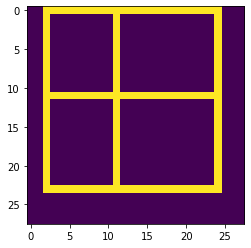

In [19]:
# use the classifier to predict the new images
classifier.modify_class_labels(np.array(["building", "not building"]))
testing_data = simulate.simulate_images((28, 28), [0, 0, 1])
testing_data.plot_image(0)
pred_labels = classifier.classify_images(testing_data.images)
print(pred_labels)

number of outlier images: 22
number of buildings outlier images: 15
number of crosses outlier images: 7


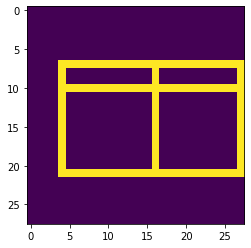

In [20]:
# check what is the outliers looks like
print("number of outlier images:", outliers.num_images)
print("number of buildings outlier images:", outliers.class_sizes[0])
print("number of crosses outlier images:", outliers.class_sizes[1])
outliers.plot_image(20)